In [1]:
import sys
sys.path.append('..')

import numpy as np
from matplotlib import pyplot as plt

%load_ext autoreload
%autoreload 2

In [8]:

R=1
ps=np.array([[1,0],[0,2],[3,0]])
n_p = len(ps)
max_speed=0.22
dt = 1
n_steps = 300
p_trajs=[]

step_size = max_speed*dt
ps=ps.reshape(-1,2)

origin= np.mean(ps,axis = 0)

phi = 2*np.pi/n_p
destinations = origin + R * np.array([[np.cos(phi*j),np.sin(phi*j)] for j in range(n_p)])
np.array([ps,destinations])

array([[[ 1.        ,  0.        ],
        [ 0.        ,  2.        ],
        [ 3.        ,  0.        ]],

       [[ 2.33333333,  0.66666667],
        [ 0.83333333,  1.53269207],
        [ 0.83333333, -0.19935874]]])

In [36]:
step_size = max_speed*dt
ps=ps.reshape(-1,2)

phi = 2*np.pi/n_p


CoM = np.mean(ps,axis = 0)

phi_0 = np.arctan2(ps[0,1]-CoM[1],ps[0,0]-CoM[0])

destinations = CoM + R * np.array([[np.cos(phi_0+phi*j),np.sin(phi_0+phi*j)] for j in range(n_p)])

# reached = np.all(np.linalg.norm(destinations-ps,axis=1)<epsilon)

dists = np.repeat(step_size* np.arange(n_steps+1),n_p).reshape(-1,n_p)
max_dists = np.linalg.norm(destinations-ps,axis=1)
for i in range(n_p):
    dists[:,i][dists[:,i]>max_dists[i]]=max_dists[i]

print(directions)
print(destinations)
directions = (((destinations-CoM).T/np.linalg.norm(destinations-ps,axis=1)).T)
directions = np.expand_dims(directions,axis=2)

directions = np.transpose(directions,(2,0,1))


directions = np.repeat(directions,len(dists),axis=0)

waypoints = directions*dists[:,:,np.newaxis] + CoM

[[[-1.75623059 -3.51246118]
  [ 0.37574117  0.02255315]
  [-0.20574888  0.31162078]]

 [[-1.75623059 -3.51246118]
  [ 0.37574117  0.02255315]
  [-0.20574888  0.31162078]]

 [[-1.75623059 -3.51246118]
  [ 0.37574117  0.02255315]
  [-0.20574888  0.31162078]]

 ...

 [[-1.75623059 -3.51246118]
  [ 0.37574117  0.02255315]
  [-0.20574888  0.31162078]]

 [[-1.75623059 -3.51246118]
  [ 0.37574117  0.02255315]
  [-0.20574888  0.31162078]]

 [[-1.75623059 -3.51246118]
  [ 0.37574117  0.02255315]
  [-0.20574888  0.31162078]]]
[[ 0.88611974 -0.22776052]
 [ 2.3315368   0.72658193]
 [ 0.78234346  1.5011786 ]]


In [31]:
ps

array([[1, 0],
       [0, 2],
       [3, 0]])

In [32]:
destinations

array([[ 0.88611974, -0.22776052],
       [ 2.3315368 ,  0.72658193],
       [ 0.78234346,  1.5011786 ]])

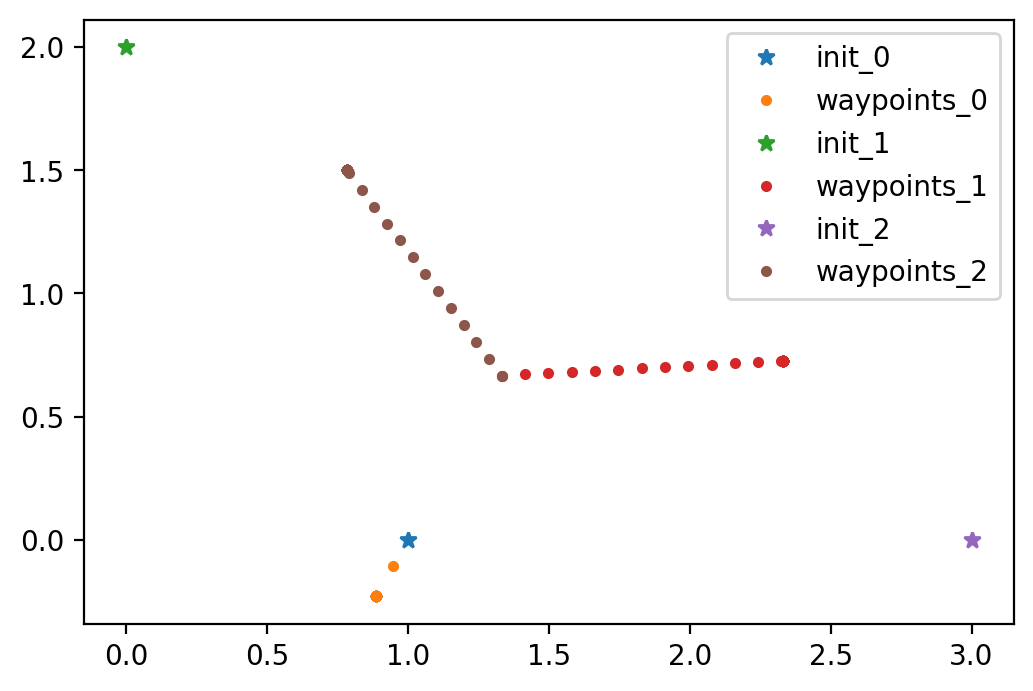

In [30]:
fig = plt.figure(dpi=200)
for i in range(n_p):
    plt.plot(ps[i,0],ps[i,1],'*',label = 'init_{}'.format(i))
    plt.plot(waypoints[:,i,0],waypoints[:,i,1],'.',label= 'waypoints_{}'.format(i))
plt.legend()
plt.show()